In [3]:
import pandas as pd
from google.colab import drive
drive.mount('/content/gdrive')
df = pd.read_csv("/content/newest_invoices_data.csv")

Mounted at /content/gdrive


In [4]:
# Display basic information about the dataset
print(df.info())

# Display summary statistics
print(df.describe())

# Display the first few rows of the dataset
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id_invoice     10000 non-null  int64  
 1   issuedDate     10000 non-null  object 
 2   country        10000 non-null  object 
 3   service        10000 non-null  object 
 4   total          10000 non-null  float64
 5   discount       10000 non-null  float64
 6   tax            10000 non-null  float64
 7   invoiceStatus  10000 non-null  object 
 8   balance        10000 non-null  float64
 9   dueDate        10000 non-null  object 
 10  client         10000 non-null  object 
dtypes: float64(4), int64(1), object(6)
memory usage: 859.5+ KB
None
        id_invoice         total      discount           tax       balance
count  10000.00000  10000.000000  10000.000000  10000.000000  10000.000000
mean      50.47610   3337.413969    332.527743    166.439248   3171.325474
std       29.02202   2353.

In [5]:
# Handle missing values
df.dropna(inplace=True)

# Remove duplicates
df.drop_duplicates(inplace=True)

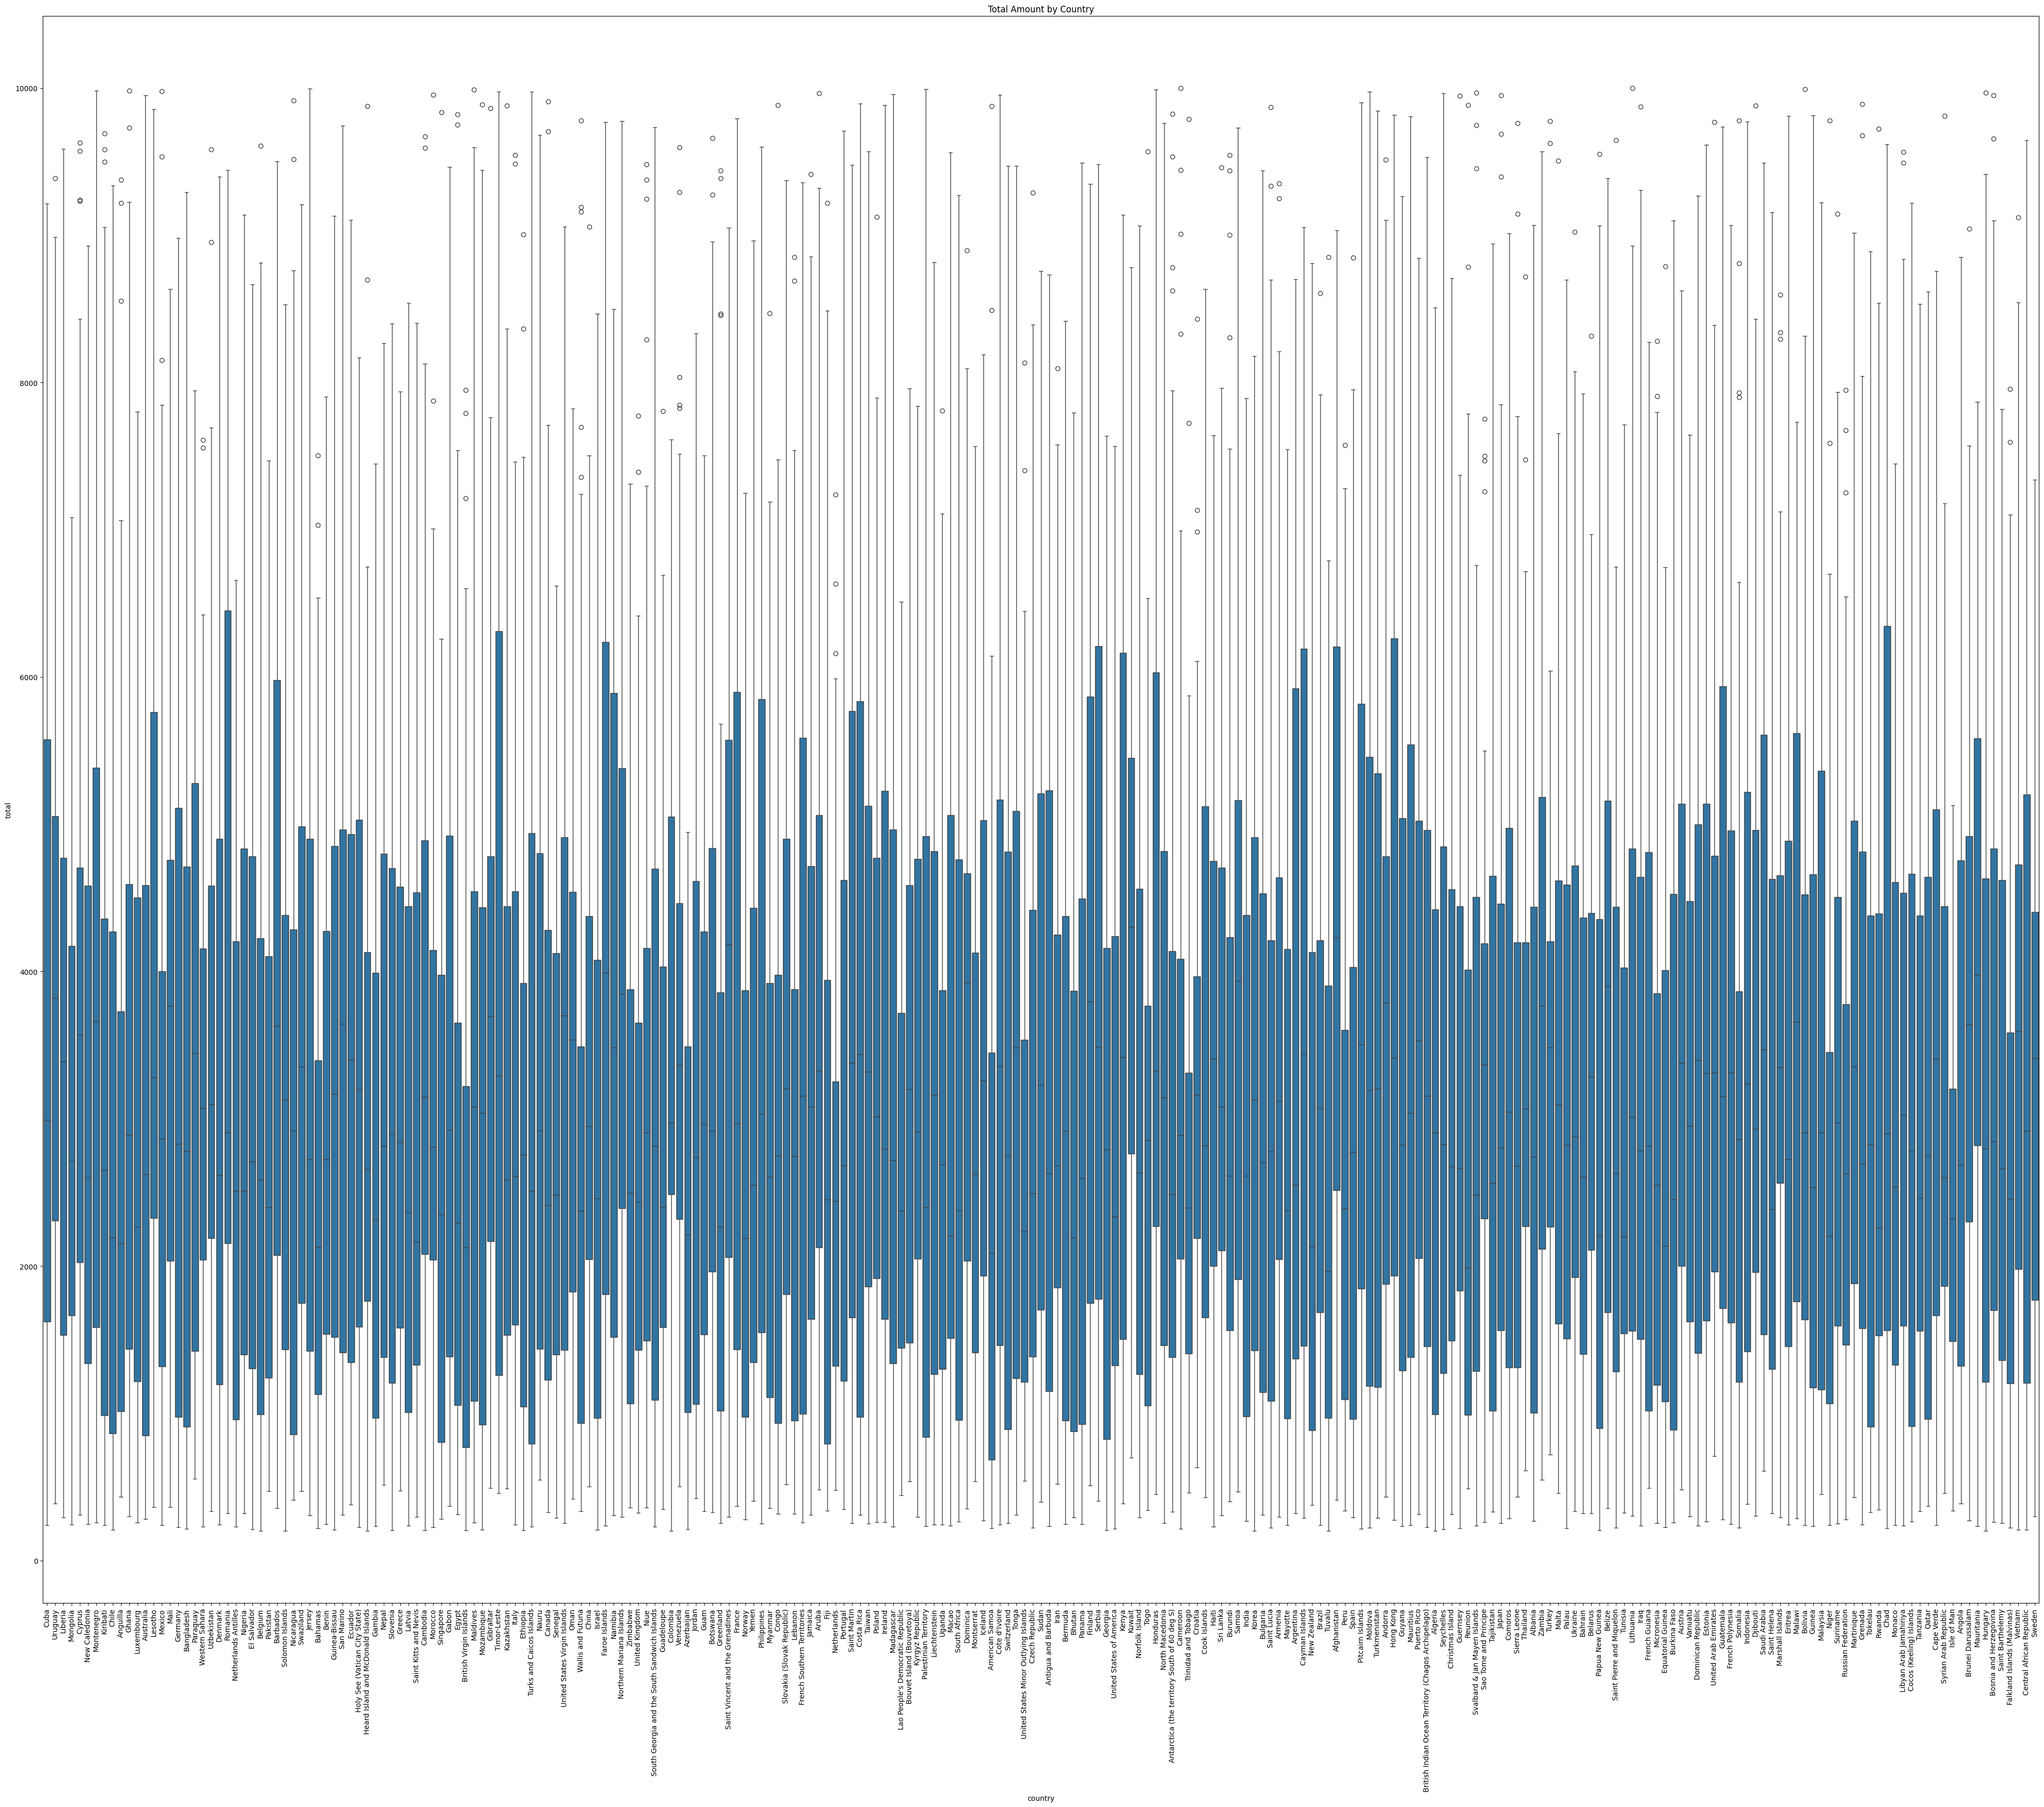

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Plot total amount by country
plt.figure(figsize=(50, 40))
sns.boxplot(x="country", y="total", data=df)
plt.title("Total Amount by Country")
plt.xticks(rotation=90)
plt.show()

In [9]:
# Extract year and month from issuedDate
df["issuedYear"] = pd.to_datetime(df["issuedDate"]).dt.year
df["issuedMonth"] = pd.to_datetime(df["issuedDate"]).dt.month

In [15]:
avg_total_by_service = df.groupby("service")["total"].mean()
avg_total_by_service

service
AI Solution               6538.730927
E-commerce Development    3021.218109
IoT Solution              4989.033193
Mobile App Development    3042.334663
UI/UX Design               604.287052
Web Development           1762.550006
Name: total, dtype: float64

In [16]:
top_clients = df.groupby("client")["total"].sum().sort_values(ascending=False).head(10)
print(top_clients)

client
Company C    6998999.02
Company B    6774232.38
Company E    6656673.24
Company A    6478227.83
Company D    6466007.22
Name: total, dtype: float64


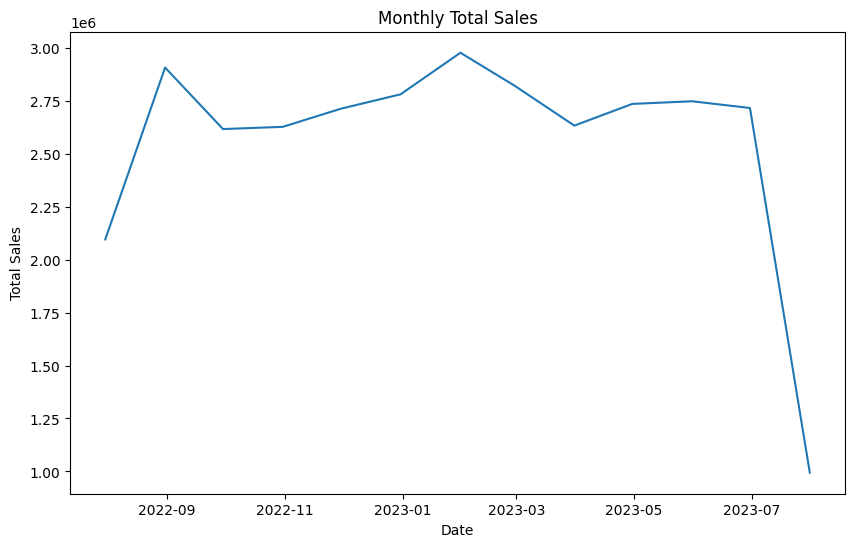

In [17]:
# Convert 'issuedDate' to datetime
df['issuedDate'] = pd.to_datetime(df['issuedDate'])

# Set 'issuedDate' as index for time series analysis
df.set_index('issuedDate', inplace=True)

# Resample data to monthly frequency and calculate total sales
monthly_sales = df['total'].resample('M').sum()

# Plot time series data
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(monthly_sales)
plt.title('Monthly Total Sales')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()


In [18]:
# Invoice status distribution
invoice_status_counts = df['invoiceStatus'].value_counts()

# Average discount and tax by service type
avg_discount_by_service = df.groupby('service')['discount'].mean()
avg_tax_by_service = df.groupby('service')['tax'].mean()

top_clients = df.groupby('client')['total'].sum().nlargest(10)


In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv("//content/newest_invoices_data.csv")

# Handle missing values (if any)
df.dropna(inplace=True)

# Split data into features (X) and target (y)
X = df.drop(columns=["total"])
y = df["total"]


In [20]:
from sklearn.preprocessing import OneHotEncoder

# Select categorical columns for encoding
categorical_columns = ["country", "invoiceStatus", "client"]

# Perform one-hot encoding
encoder = OneHotEncoder(sparse=False, drop="first")
X_encoded = encoder.fit_transform(X[categorical_columns])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [21]:
from sklearn.preprocessing import StandardScaler

# Select numerical columns for scaling
numerical_columns = ["discount", "tax", "balance"]

# Perform standard scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[numerical_columns])


In [22]:
import numpy as np

X_final = np.hstack((X_encoded, X_scaled))


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)

In [24]:
from sklearn.linear_model import LinearRegression

# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [25]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 2.9989320017010646e-24
R-squared: 1.0
